## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [15]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [16]:
#objective function
def obj(x):
    return -x + 2
x = np.linspace(0,20)
y = obj(x)
print(y.shape)
print(y)
print(x.shape)
print(x)

(50,)
[  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.83673469
 -10.24489796 -10.65306122 -11.06122449 -11.46938776 -11.87755102
 -12.28571429 -12.69387755 -13.10204082 -13.51020408 -13.91836735
 -14.32653061 -14.73469388 -15.14285714 -15.55102041 -15.95918367
 -16.36734694 -16.7755102  -17.18367347 -17.59183673 -18.        ]
(50,)
[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449 

In [17]:
y = y.reshape((y.shape[0],1))
x = x.reshape((x.shape[0],1))
print(y.shape)
print(y)
print(x.shape)
print(x)

(50, 1)
[[  2.        ]
 [  1.59183673]
 [  1.18367347]
 [  0.7755102 ]
 [  0.36734694]
 [ -0.04081633]
 [ -0.44897959]
 [ -0.85714286]
 [ -1.26530612]
 [ -1.67346939]
 [ -2.08163265]
 [ -2.48979592]
 [ -2.89795918]
 [ -3.30612245]
 [ -3.71428571]
 [ -4.12244898]
 [ -4.53061224]
 [ -4.93877551]
 [ -5.34693878]
 [ -5.75510204]
 [ -6.16326531]
 [ -6.57142857]
 [ -6.97959184]
 [ -7.3877551 ]
 [ -7.79591837]
 [ -8.20408163]
 [ -8.6122449 ]
 [ -9.02040816]
 [ -9.42857143]
 [ -9.83673469]
 [-10.24489796]
 [-10.65306122]
 [-11.06122449]
 [-11.46938776]
 [-11.87755102]
 [-12.28571429]
 [-12.69387755]
 [-13.10204082]
 [-13.51020408]
 [-13.91836735]
 [-14.32653061]
 [-14.73469388]
 [-15.14285714]
 [-15.55102041]
 [-15.95918367]
 [-16.36734694]
 [-16.7755102 ]
 [-17.18367347]
 [-17.59183673]
 [-18.        ]]
(50, 1)
[[ 0.        ]
 [ 0.40816327]
 [ 0.81632653]
 [ 1.2244898 ]
 [ 1.63265306]
 [ 2.04081633]
 [ 2.44897959]
 [ 2.85714286]
 [ 3.26530612]
 [ 3.67346939]
 [ 4.08163265]
 [ 4.48979592]
 [ 

In [18]:
data = np.concatenate((x,y),axis=1)
np.random.shuffle(data)
print(data)

[[  7.75510204  -5.75510204]
 [ 15.10204082 -13.10204082]
 [ 18.7755102  -16.7755102 ]
 [  6.53061224  -4.53061224]
 [  8.97959184  -6.97959184]
 [  0.81632653   1.18367347]
 [ 11.02040816  -9.02040816]
 [ 10.6122449   -8.6122449 ]
 [ 13.87755102 -11.87755102]
 [ 10.20408163  -8.20408163]
 [  1.63265306   0.36734694]
 [ 13.46938776 -11.46938776]
 [  8.16326531  -6.16326531]
 [  9.3877551   -7.3877551 ]
 [  8.57142857  -6.57142857]
 [ 11.42857143  -9.42857143]
 [  4.89795918  -2.89795918]
 [ 19.59183673 -17.59183673]
 [ 20.         -18.        ]
 [  5.71428571  -3.71428571]
 [  3.67346939  -1.67346939]
 [ 15.91836735 -13.91836735]
 [ 12.24489796 -10.24489796]
 [  0.40816327   1.59183673]
 [ 17.95918367 -15.95918367]
 [  4.08163265  -2.08163265]
 [  4.48979592  -2.48979592]
 [ 17.14285714 -15.14285714]
 [ 12.65306122 -10.65306122]
 [  6.12244898  -4.12244898]
 [  7.34693878  -5.34693878]
 [ 17.55102041 -15.55102041]
 [ 16.32653061 -14.32653061]
 [ 18.36734694 -16.36734694]
 [ 15.51020408

In [19]:
x = data[:,0]
y = data[:,1]
print(y.shape)
print(y)
print(x.shape)
print(x)

(50,)
[ -5.75510204 -13.10204082 -16.7755102   -4.53061224  -6.97959184
   1.18367347  -9.02040816  -8.6122449  -11.87755102  -8.20408163
   0.36734694 -11.46938776  -6.16326531  -7.3877551   -6.57142857
  -9.42857143  -2.89795918 -17.59183673 -18.          -3.71428571
  -1.67346939 -13.91836735 -10.24489796   1.59183673 -15.95918367
  -2.08163265  -2.48979592 -15.14285714 -10.65306122  -4.12244898
  -5.34693878 -15.55102041 -14.32653061 -16.36734694 -13.51020408
  -0.85714286  -0.04081633   2.         -12.28571429  -9.83673469
 -12.69387755  -3.30612245 -11.06122449 -17.18367347 -14.73469388
  -7.79591837  -4.93877551  -1.26530612   0.7755102   -0.44897959]
(50,)
[ 7.75510204 15.10204082 18.7755102   6.53061224  8.97959184  0.81632653
 11.02040816 10.6122449  13.87755102 10.20408163  1.63265306 13.46938776
  8.16326531  9.3877551   8.57142857 11.42857143  4.89795918 19.59183673
 20.          5.71428571  3.67346939 15.91836735 12.24489796  0.40816327
 17.95918367  4.08163265  4.4897959

In [20]:
y = y.reshape((y.shape[0],1))
x = x.reshape((x.shape[0],1))
print(y.shape)
print(y)
print(x.shape)
print(x)

(50, 1)
[[ -5.75510204]
 [-13.10204082]
 [-16.7755102 ]
 [ -4.53061224]
 [ -6.97959184]
 [  1.18367347]
 [ -9.02040816]
 [ -8.6122449 ]
 [-11.87755102]
 [ -8.20408163]
 [  0.36734694]
 [-11.46938776]
 [ -6.16326531]
 [ -7.3877551 ]
 [ -6.57142857]
 [ -9.42857143]
 [ -2.89795918]
 [-17.59183673]
 [-18.        ]
 [ -3.71428571]
 [ -1.67346939]
 [-13.91836735]
 [-10.24489796]
 [  1.59183673]
 [-15.95918367]
 [ -2.08163265]
 [ -2.48979592]
 [-15.14285714]
 [-10.65306122]
 [ -4.12244898]
 [ -5.34693878]
 [-15.55102041]
 [-14.32653061]
 [-16.36734694]
 [-13.51020408]
 [ -0.85714286]
 [ -0.04081633]
 [  2.        ]
 [-12.28571429]
 [ -9.83673469]
 [-12.69387755]
 [ -3.30612245]
 [-11.06122449]
 [-17.18367347]
 [-14.73469388]
 [ -7.79591837]
 [ -4.93877551]
 [ -1.26530612]
 [  0.7755102 ]
 [ -0.44897959]]
(50, 1)
[[ 7.75510204]
 [15.10204082]
 [18.7755102 ]
 [ 6.53061224]
 [ 8.97959184]
 [ 0.81632653]
 [11.02040816]
 [10.6122449 ]
 [13.87755102]
 [10.20408163]
 [ 1.63265306]
 [13.46938776]
 [ 

In [21]:
x = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)
print(x.shape)
print(x)

(50, 2)
[[ 1.          7.75510204]
 [ 1.         15.10204082]
 [ 1.         18.7755102 ]
 [ 1.          6.53061224]
 [ 1.          8.97959184]
 [ 1.          0.81632653]
 [ 1.         11.02040816]
 [ 1.         10.6122449 ]
 [ 1.         13.87755102]
 [ 1.         10.20408163]
 [ 1.          1.63265306]
 [ 1.         13.46938776]
 [ 1.          8.16326531]
 [ 1.          9.3877551 ]
 [ 1.          8.57142857]
 [ 1.         11.42857143]
 [ 1.          4.89795918]
 [ 1.         19.59183673]
 [ 1.         20.        ]
 [ 1.          5.71428571]
 [ 1.          3.67346939]
 [ 1.         15.91836735]
 [ 1.         12.24489796]
 [ 1.          0.40816327]
 [ 1.         17.95918367]
 [ 1.          4.08163265]
 [ 1.          4.48979592]
 [ 1.         17.14285714]
 [ 1.         12.65306122]
 [ 1.          6.12244898]
 [ 1.          7.34693878]
 [ 1.         17.55102041]
 [ 1.         16.32653061]
 [ 1.         18.36734694]
 [ 1.         15.51020408]
 [ 1.          2.85714286]
 [ 1.          2.040

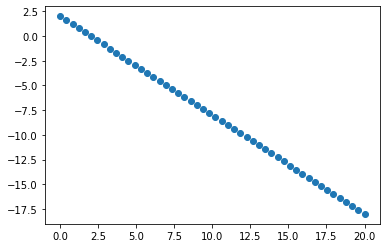

In [23]:
_ = plt.scatter(x[:,1],y)

In [123]:
theta = np.zeros((1,x.shape[1]))
print(theta)
print(theta.shape)

[[0. 0.]]
(1, 2)


#### Plot your data points. 

In [124]:
v = np.zeros((1,x.shape[1]))
print(theta)
print(theta.shape)

[[0. 0.]]
(1, 2)


#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [125]:
# cost function
def cost(x, y, theta):
    # x(13,2) . theta(1,2) = h(13,1)
    h_x = x @ theta.T
    error = ((h_x - y).T @ (h_x - y))/2*x.shape[0]
    return error[0,0]

In [126]:
def grad (x, y, theta):
    # x(13,2) @ theta(1,2) = h(13,1)
    h_x = x @ theta.T
    # x(13,2) - h(13,1) = g(13,1)
    grad = x.T @ (h_x - y) / x.shape[0]
    return grad.T

In [127]:
def Mom(x, y, theta_min, it, v_min ,alpha, gam):
    pred = [x @ theta_min.T]
    vt = [v_min]
    thetas = [theta_min]            # a list of thetas (list of arrays (1,2))
    error = [cost(x, y, theta_min)]  # a list of output of cost function (list of values)
    for i in range(it):
        theta_min = theta_min - v_min
        v_min = alpha * grad(x, y, theta_min) + gam * v_min
        vt.append(v_min)
        error.append(cost(x, y, theta_min))
        thetas.append(theta_min)
        pred.append(x @ theta_min.T)
    return thetas, theta_min, error, pred

In [128]:
epochs = 100000
alpha = 0.0001
gam = .6
thetas, theta_min, cost, pred = Mom(x, y, theta, epochs, v, alpha, gam) 
print(theta_min)
print(cost[-1])
print(thetas[-1])

[[ 1.99658829 -0.99974622]]
0.003747689011735539
[[ 1.99658829 -0.99974622]]


In [129]:
print(len(pred))
print(len(pred[-1]))

100001
50


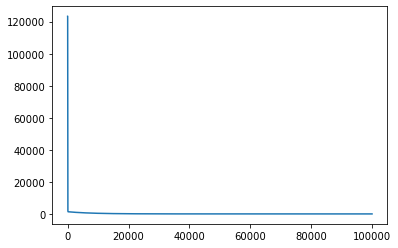

In [130]:
plt.plot(range(len(cost)),cost)  #range(len(cost)) is the number of iterations 

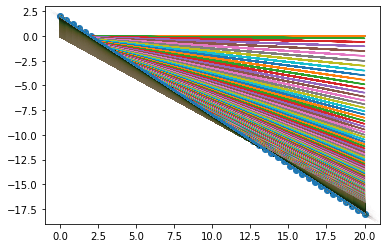

In [131]:
plt.scatter(x[:,1],y)
for i in  pred:
    plt.plot(x[:,1],i)

In [132]:
f = x @ theta_min.T
print(np.concatenate((f,y),axis=1))

[[ -5.75654569  -5.75510204]
 [-13.10161999 -13.10204082]
 [-16.77415714 -16.7755102 ]
 [ -4.53236664  -4.53061224]
 [ -6.98072474  -6.97959184]
 [  1.18046892   1.18367347]
 [ -9.02102316  -9.02040816]
 [ -8.61296347  -8.6122449 ]
 [-11.87744094 -11.87755102]
 [ -8.20490379  -8.20408163]
 [  0.36434956   0.36734694]
 [-11.46938125 -11.46938776]
 [ -6.16460537  -6.16326531]
 [ -7.38878442  -7.3877551 ]
 [ -6.57266506  -6.57142857]
 [ -9.42908284  -9.42857143]
 [ -2.90012791  -2.89795918]
 [-17.5902765  -17.59183673]
 [-17.99833619 -18.        ]
 [ -3.71624727  -3.71428571]
 [ -1.67594886  -1.67346939]
 [-13.91773935 -13.91836735]
 [-10.2452022  -10.24489796]
 [  1.58852861   1.59183673]
 [-15.95803777 -15.95918367]
 [ -2.08400854  -2.08163265]
 [ -2.49206822  -2.48979592]
 [-15.1419184  -15.14285714]
 [-10.65326189 -10.65306122]
 [ -4.12430696  -4.12244898]
 [ -5.34848601  -5.34693878]
 [-15.54997809 -15.55102041]
 [-14.32579904 -14.32653061]
 [-16.36609745 -16.36734694]
 [-13.50967967

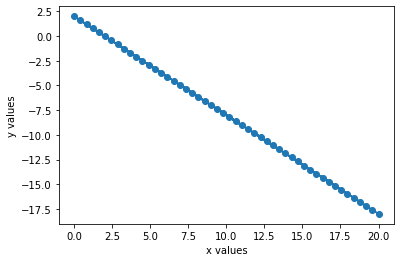

In [133]:
_ = plt.scatter(x[:,1],y)
_ = plt.xlabel('x values')
_ = plt.ylabel('y values')
_ = plt.plot(x[:,1],f)

Text(0, 0.5, 'Cost Value')

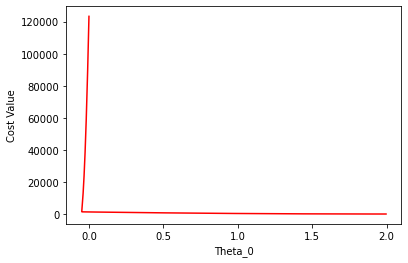

In [134]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,0], cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

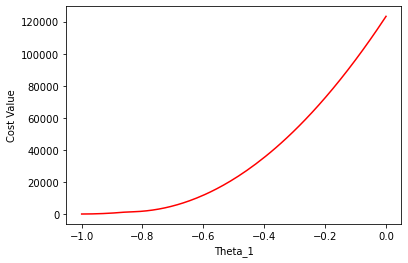

In [135]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,1], cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

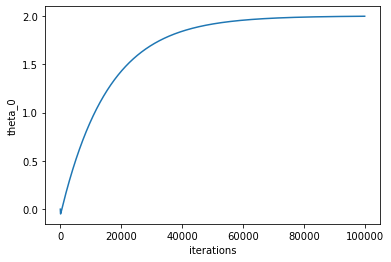

In [136]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(cost)),thetas[:,0])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_0')

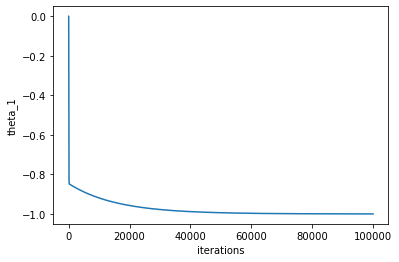

In [137]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(cost)),thetas[:,1])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_1')

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

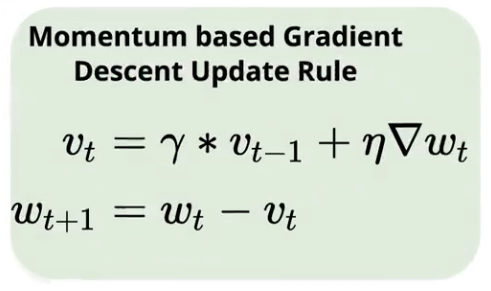

#### γ takes values between 0 and 1.
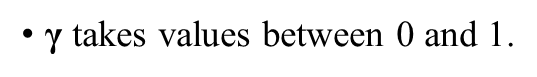

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

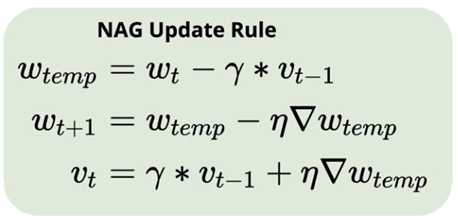

In [138]:
#objective function
def obj(x):
    return -x + 2
x = np.linspace(0,20)
y = obj(x)
print(y.shape)
print(y)
print(x.shape)
print(x)

(50,)
[  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.83673469
 -10.24489796 -10.65306122 -11.06122449 -11.46938776 -11.87755102
 -12.28571429 -12.69387755 -13.10204082 -13.51020408 -13.91836735
 -14.32653061 -14.73469388 -15.14285714 -15.55102041 -15.95918367
 -16.36734694 -16.7755102  -17.18367347 -17.59183673 -18.        ]
(50,)
[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449 

In [139]:
y = y.reshape((y.shape[0],1))
x = x.reshape((x.shape[0],1))
print(y.shape)
print(y)
print(x.shape)
print(x)

(50, 1)
[[  2.        ]
 [  1.59183673]
 [  1.18367347]
 [  0.7755102 ]
 [  0.36734694]
 [ -0.04081633]
 [ -0.44897959]
 [ -0.85714286]
 [ -1.26530612]
 [ -1.67346939]
 [ -2.08163265]
 [ -2.48979592]
 [ -2.89795918]
 [ -3.30612245]
 [ -3.71428571]
 [ -4.12244898]
 [ -4.53061224]
 [ -4.93877551]
 [ -5.34693878]
 [ -5.75510204]
 [ -6.16326531]
 [ -6.57142857]
 [ -6.97959184]
 [ -7.3877551 ]
 [ -7.79591837]
 [ -8.20408163]
 [ -8.6122449 ]
 [ -9.02040816]
 [ -9.42857143]
 [ -9.83673469]
 [-10.24489796]
 [-10.65306122]
 [-11.06122449]
 [-11.46938776]
 [-11.87755102]
 [-12.28571429]
 [-12.69387755]
 [-13.10204082]
 [-13.51020408]
 [-13.91836735]
 [-14.32653061]
 [-14.73469388]
 [-15.14285714]
 [-15.55102041]
 [-15.95918367]
 [-16.36734694]
 [-16.7755102 ]
 [-17.18367347]
 [-17.59183673]
 [-18.        ]]
(50, 1)
[[ 0.        ]
 [ 0.40816327]
 [ 0.81632653]
 [ 1.2244898 ]
 [ 1.63265306]
 [ 2.04081633]
 [ 2.44897959]
 [ 2.85714286]
 [ 3.26530612]
 [ 3.67346939]
 [ 4.08163265]
 [ 4.48979592]
 [ 

In [140]:
data = np.concatenate((x,y),axis=1)
np.random.shuffle(data)
print(data)

[[  6.53061224  -4.53061224]
 [ 11.42857143  -9.42857143]
 [  8.16326531  -6.16326531]
 [ 15.91836735 -13.91836735]
 [ 15.10204082 -13.10204082]
 [  9.79591837  -7.79591837]
 [ 12.24489796 -10.24489796]
 [  3.26530612  -1.26530612]
 [ 18.36734694 -16.36734694]
 [ 12.65306122 -10.65306122]
 [ 14.69387755 -12.69387755]
 [ 13.06122449 -11.06122449]
 [ 19.18367347 -17.18367347]
 [ 13.87755102 -11.87755102]
 [  0.           2.        ]
 [ 16.32653061 -14.32653061]
 [ 15.51020408 -13.51020408]
 [  2.04081633  -0.04081633]
 [  4.08163265  -2.08163265]
 [ 11.83673469  -9.83673469]
 [ 11.02040816  -9.02040816]
 [ 13.46938776 -11.46938776]
 [ 10.6122449   -8.6122449 ]
 [  7.75510204  -5.75510204]
 [ 14.28571429 -12.28571429]
 [  6.12244898  -4.12244898]
 [  2.85714286  -0.85714286]
 [  7.34693878  -5.34693878]
 [  1.2244898    0.7755102 ]
 [ 16.73469388 -14.73469388]
 [  2.44897959  -0.44897959]
 [ 17.14285714 -15.14285714]
 [ 17.95918367 -15.95918367]
 [ 19.59183673 -17.59183673]
 [ 10.20408163

In [141]:
x = data[:,0]
y = data[:,1]
print(y.shape)
print(y)
print(x.shape)
print(x)

(50,)
[ -4.53061224  -9.42857143  -6.16326531 -13.91836735 -13.10204082
  -7.79591837 -10.24489796  -1.26530612 -16.36734694 -10.65306122
 -12.69387755 -11.06122449 -17.18367347 -11.87755102   2.
 -14.32653061 -13.51020408  -0.04081633  -2.08163265  -9.83673469
  -9.02040816 -11.46938776  -8.6122449   -5.75510204 -12.28571429
  -4.12244898  -0.85714286  -5.34693878   0.7755102  -14.73469388
  -0.44897959 -15.14285714 -15.95918367 -17.59183673  -8.20408163
  -6.57142857  -3.71428571  -1.67346939  -7.3877551  -18.
   0.36734694  -4.93877551 -16.7755102   -2.89795918  -2.48979592
   1.59183673 -15.55102041   1.18367347  -3.30612245  -6.97959184]
(50,)
[ 6.53061224 11.42857143  8.16326531 15.91836735 15.10204082  9.79591837
 12.24489796  3.26530612 18.36734694 12.65306122 14.69387755 13.06122449
 19.18367347 13.87755102  0.         16.32653061 15.51020408  2.04081633
  4.08163265 11.83673469 11.02040816 13.46938776 10.6122449   7.75510204
 14.28571429  6.12244898  2.85714286  7.34693878  1

In [142]:
y = y.reshape((y.shape[0],1))
x = x.reshape((x.shape[0],1))
print(y.shape)
print(y)
print(x.shape)
print(x)

(50, 1)
[[ -4.53061224]
 [ -9.42857143]
 [ -6.16326531]
 [-13.91836735]
 [-13.10204082]
 [ -7.79591837]
 [-10.24489796]
 [ -1.26530612]
 [-16.36734694]
 [-10.65306122]
 [-12.69387755]
 [-11.06122449]
 [-17.18367347]
 [-11.87755102]
 [  2.        ]
 [-14.32653061]
 [-13.51020408]
 [ -0.04081633]
 [ -2.08163265]
 [ -9.83673469]
 [ -9.02040816]
 [-11.46938776]
 [ -8.6122449 ]
 [ -5.75510204]
 [-12.28571429]
 [ -4.12244898]
 [ -0.85714286]
 [ -5.34693878]
 [  0.7755102 ]
 [-14.73469388]
 [ -0.44897959]
 [-15.14285714]
 [-15.95918367]
 [-17.59183673]
 [ -8.20408163]
 [ -6.57142857]
 [ -3.71428571]
 [ -1.67346939]
 [ -7.3877551 ]
 [-18.        ]
 [  0.36734694]
 [ -4.93877551]
 [-16.7755102 ]
 [ -2.89795918]
 [ -2.48979592]
 [  1.59183673]
 [-15.55102041]
 [  1.18367347]
 [ -3.30612245]
 [ -6.97959184]]
(50, 1)
[[ 6.53061224]
 [11.42857143]
 [ 8.16326531]
 [15.91836735]
 [15.10204082]
 [ 9.79591837]
 [12.24489796]
 [ 3.26530612]
 [18.36734694]
 [12.65306122]
 [14.69387755]
 [13.06122449]
 [1

In [143]:
x = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)
print(x.shape)
print(x)

(50, 2)
[[ 1.          6.53061224]
 [ 1.         11.42857143]
 [ 1.          8.16326531]
 [ 1.         15.91836735]
 [ 1.         15.10204082]
 [ 1.          9.79591837]
 [ 1.         12.24489796]
 [ 1.          3.26530612]
 [ 1.         18.36734694]
 [ 1.         12.65306122]
 [ 1.         14.69387755]
 [ 1.         13.06122449]
 [ 1.         19.18367347]
 [ 1.         13.87755102]
 [ 1.          0.        ]
 [ 1.         16.32653061]
 [ 1.         15.51020408]
 [ 1.          2.04081633]
 [ 1.          4.08163265]
 [ 1.         11.83673469]
 [ 1.         11.02040816]
 [ 1.         13.46938776]
 [ 1.         10.6122449 ]
 [ 1.          7.75510204]
 [ 1.         14.28571429]
 [ 1.          6.12244898]
 [ 1.          2.85714286]
 [ 1.          7.34693878]
 [ 1.          1.2244898 ]
 [ 1.         16.73469388]
 [ 1.          2.44897959]
 [ 1.         17.14285714]
 [ 1.         17.95918367]
 [ 1.         19.59183673]
 [ 1.         10.20408163]
 [ 1.          8.57142857]
 [ 1.          5.714

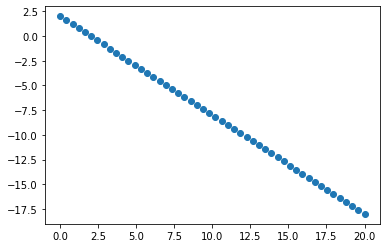

In [144]:
_ = plt.scatter(x[:,1],y)

In [169]:
theta = np.zeros((1,x.shape[1]))
print(theta)
print(theta.shape)

[[0. 0.]]
(1, 2)


In [170]:
theta = np.zeros((1,x.shape[1]))
print(theta)
print(theta.shape)

[[0. 0.]]
(1, 2)


In [171]:
v = np.zeros((1,x.shape[1]))
print(theta)
print(theta.shape)

[[0. 0.]]
(1, 2)


In [172]:
# cost function
def cost(x, y, theta):
    # x(13,2) . theta(1,2) = h(13,1)
    h_x = x @ theta.T
    error = ((h_x - y).T @ (h_x - y))/2*x.shape[0]
    return error[0,0]

In [173]:
def grad (x, y, theta):
    # x(13,2) @ theta(1,2) = h(13,1)
    h_x = x @ theta.T
    # x(13,2) - h(13,1) = g(13,1)
    grad = x.T @ (h_x - y) / x.shape[0]
    return grad.T

In [174]:
def NAG(x, y, theta_min, it, v_min ,alpha, gam):
    pred = [x @ theta_min.T]
    vt = [v_min]
    thetas = [theta_min]            # a list of thetas (list of arrays (1,2))
    error = [cost(x, y, theta_min)]  # a list of output of cost function (list of values)
    for i in range(it):
        theta_min_tmp = theta_min - gam * v_min
        theta_min = theta_min_tmp - alpha * grad(x, y, theta_min_tmp)
        v_min = alpha * grad(x, y, theta_min_tmp) + gam * v_min
        vt.append(v_min)
        error.append(cost(x, y, theta_min))
        pred.append(x @ theta_min.T)
        thetas.append(theta_min)
    return thetas, theta_min, error, pred

In [175]:
epochs = 10000
alpha = 0.001
gam = .9
thetas, theta_min, cost, pred = Mom(x, y, theta, epochs, v, alpha, gam) 
print(theta_min)
print(cost[-1])
print(thetas[-1])

[[ 2. -1.]]
2.1930769927845065e-20
[[ 2. -1.]]


In [176]:
print(len(pred))
print(len(pred[-1]))

10001
50


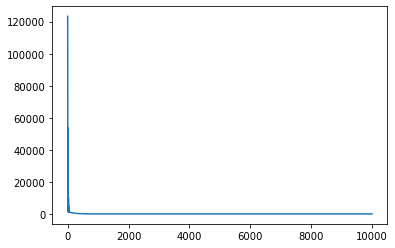

In [177]:
plt.plot(range(len(cost)),cost)  #range(len(cost)) is the number of iterations 

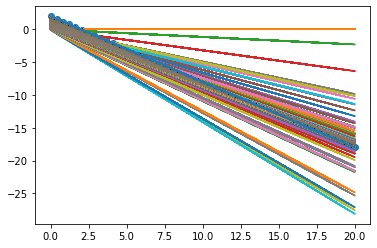

In [178]:
plt.scatter(x[:,1],y)
for i in  pred:
    plt.plot(x[:,1],i)

In [179]:
f = x @ theta_min.T
print(np.concatenate((f,y),axis=1))

[[ -4.53061224  -4.53061224]
 [ -9.42857143  -9.42857143]
 [ -6.16326531  -6.16326531]
 [-13.91836735 -13.91836735]
 [-13.10204082 -13.10204082]
 [ -7.79591837  -7.79591837]
 [-10.24489796 -10.24489796]
 [ -1.26530612  -1.26530612]
 [-16.36734694 -16.36734694]
 [-10.65306122 -10.65306122]
 [-12.69387755 -12.69387755]
 [-11.06122449 -11.06122449]
 [-17.18367347 -17.18367347]
 [-11.87755102 -11.87755102]
 [  2.           2.        ]
 [-14.32653061 -14.32653061]
 [-13.51020408 -13.51020408]
 [ -0.04081633  -0.04081633]
 [ -2.08163265  -2.08163265]
 [ -9.83673469  -9.83673469]
 [ -9.02040816  -9.02040816]
 [-11.46938776 -11.46938776]
 [ -8.6122449   -8.6122449 ]
 [ -5.75510204  -5.75510204]
 [-12.28571429 -12.28571429]
 [ -4.12244898  -4.12244898]
 [ -0.85714286  -0.85714286]
 [ -5.34693878  -5.34693878]
 [  0.7755102    0.7755102 ]
 [-14.73469388 -14.73469388]
 [ -0.44897959  -0.44897959]
 [-15.14285714 -15.14285714]
 [-15.95918367 -15.95918367]
 [-17.59183673 -17.59183673]
 [ -8.20408163

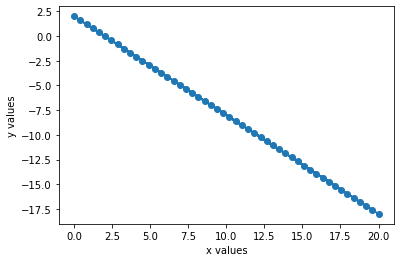

In [180]:
_ = plt.scatter(x[:,1],y)
_ = plt.xlabel('x values')
_ = plt.ylabel('y values')
_ = plt.plot(x[:,1],f)

Text(0, 0.5, 'Cost Value')

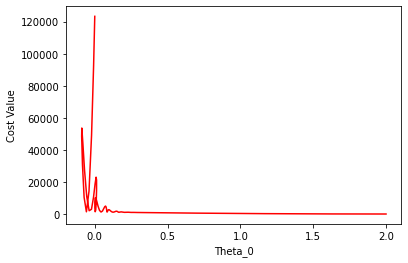

In [181]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,0], cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

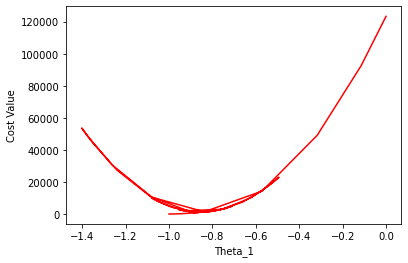

In [182]:
thetas = np.squeeze(np.array(thetas))
fig,ax = plt.subplots()
ax.plot(thetas[:,1], cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

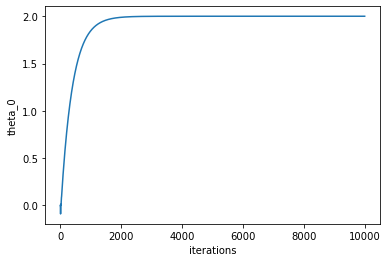

In [183]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(cost)),thetas[:,0])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_0')

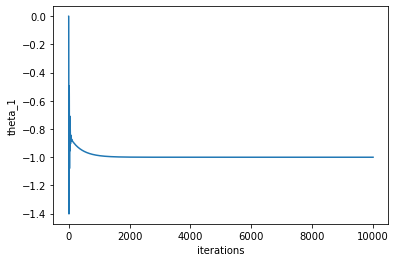

In [184]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(cost)),thetas[:,1])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_1')

## Congratulations 
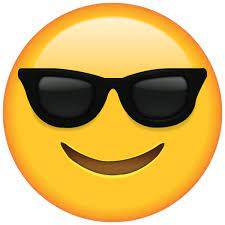